# Caso 1: Predicción de Deserción de Clientes


- 1 Importar Librerias

In [1]:
# Importar librerías 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Se importan las librerías necesarias para el análisis de datos, preprocesamiento, modelado y visualización.

- 2 Carga y Exploracion del dataset

In [2]:
#Cargar datos
df = pd.read_csv('../datos/Telco-Customer-Churn.csv')

Descripcion: Se crea una copia del mismo para su manipulación. Luego, se muestra una vista previa de los primeros registros.

In [16]:
# Exploramos el dataset
df_copia = df.copy()
df_copia.head() 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- 3 Eliminar Columnas Irrelevantes

Descripcion: Se elimina la columna customerID ya que no es relevante para el análisis.

In [17]:
df_copia = df_copia.drop(['customerID'], axis=1)

- 4 Verificar Valores Nulos

Descripcion: Se verifica si hay valores nulos en el dataset.

In [18]:
valores_nulos = df.isnull().sum()
print(valores_nulos)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


- 5 Ver Tipos de Datos

Descripcion: Se muestra información sobre los tipos de datos de cada columna.

In [19]:
df_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


- 6 Convertir Variables Categóricas en Números

Descripcion: Se convierten las variables categóricas en variables numéricas utilizando LabelEncoder.

In [20]:
encoder = LabelEncoder()
for column in df_copia.select_dtypes(include='object'):
    df_copia[column] = encoder.fit_transform(df_copia[column])

# Verificar el dataset preprocesado
df_copia.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


- 7 Separar Características y Etiqueta

Descripcion: Se separan las características (X) y la etiqueta (y), donde Churn es la variable objetivo que indica si un cliente ha desertado o no.

In [21]:
# Separar características (X) y etiqueta (y) #Churn es palabra clave para saber si el cliente deserto
X = df_copia.drop('Churn', axis=1)
y = df_copia['Churn']

- 8 Dividir en Datos de Entrenamiento y Prueba

Descripcion: Se dividen los datos en conjuntos de entrenamiento y prueba, utilizando el 20% de los datos para la prueba.

In [22]:
# Dividir en datos de entrenamiento y prueba
# 0.2 es el 20% de datos se usara para evaluar
# 80% se usa para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 9. Entrenar el Modelo con Regresión Logística

Descripcion: Se entrena un modelo de regresión logística con los datos de entrenamiento.



In [23]:
# Entrenar el modelo con Regresión Logística 
model = LogisticRegression(max_iter=5000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000, random_state=42)

- 10. Hacer Predicciones y Evaluar el Modelo

Descripcion: Se hacen predicciones con los datos de prueba y se evalúa el modelo calculando la precisión y generando un informe de clasificación

In [24]:
# Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Calcular métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8161816891412349

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



- 11 Generar Matriz de Confusion

Descripcion: Se genera y visualiza una matriz de confusión para analizar el rendimiento del modelo en términos de predicciones correctas e incorrectas.

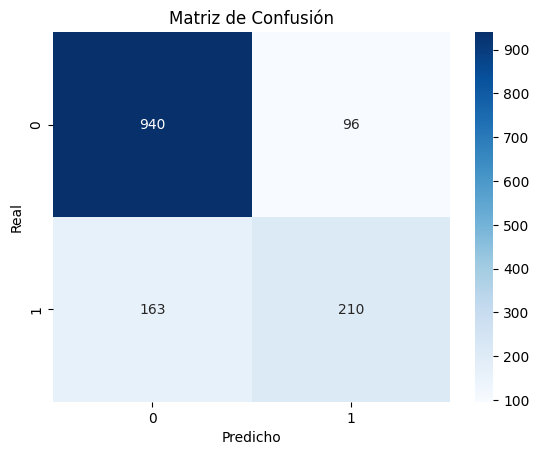

In [25]:
# Generar matriz de confusión
# 0 clientes que no desertaron
# 1 clientes que si desertaron
#columna izquierda el modelo predijo correctamente
#columna derecha el modelo predijo incorrectamente
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()


# Conclusion

El análisis y modelado realizado en este notebook tiene como objetivo predecir la deserción de clientes de una empresa de telecomunicaciones utilizando un modelo de regresión logística. A continuación, se resumen los hallazgos y resultados obtenidos:

- Preprocesamiento de Datos:

Se cargaron y exploraron los datos, eliminando columnas irrelevantes y convirtiendo variables categóricas en numéricas.
No se encontraron valores nulos en el dataset, lo cual facilitó el preprocesamiento.

- Entrenamiento del Modelo:

Se entrenó un modelo de regresión logística utilizando el 80% de los datos para entrenamiento y el 20% restante para prueba.
El modelo fue capaz de aprender las características que influyen en la deserción de clientes.

- Evaluación del Modelo:

Precisión: La precisión del modelo se evaluó utilizando la métrica de accuracy, que mide la proporción de predicciones correctas.
Informe de Clasificación: Se generó un informe de clasificación que proporciona métricas detalladas como precisión, recall y F1-score para cada clase (clientes que desertaron y clientes que no desertaron).
Matriz de Confusión: La matriz de confusión permitió visualizar el rendimiento del modelo en términos de predicciones correctas e incorrectas, mostrando cuántos clientes fueron correctamente clasificados como desertores y no desertores.